# Package: SKForecast

<img src="https://github.com/skforecast/skforecast/raw/master/images/banner-landing-page-skforecast.png?raw=true#only-light" alt="GluonTS" style="width: 30%; margin-right: 20px; border-radius: 10px;">

## First Example

In [1]:
# Libraries
# ==============================================================================
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

from skforecast.datasets import fetch_dataset
from skforecast.preprocessing import RollingFeatures
from skforecast.direct import ForecasterDirect

In [2]:
# Download data
# ==============================================================================
data = fetch_dataset(
    name="h2o", raw=True, kwargs_read_csv={"names": ["y", "datetime"], "header": 0}
)


h2o
---
Monthly expenditure ($AUD) on corticosteroid drugs that the Australian health
system had between 1991 and 2008.
Hyndman R (2023). fpp3: Data for Forecasting: Principles and Practice(3rd
Edition). http://pkg.robjhyndman.com/fpp3package/,https://github.com/robjhyndman
/fpp3package, http://OTexts.com/fpp3.
Shape of the dataset: (204, 2)


In [3]:

# Data preprocessing
# ==============================================================================
data['datetime'] = pd.to_datetime(data['datetime'], format='%Y-%m-%d')
data = data.set_index('datetime')
data = data.asfreq('MS')
data = data['y']
data = data.sort_index()


In [4]:

# Split train-test
# ==============================================================================
steps = 36
data_train = data[:-steps]
data_test  = data[-steps:]


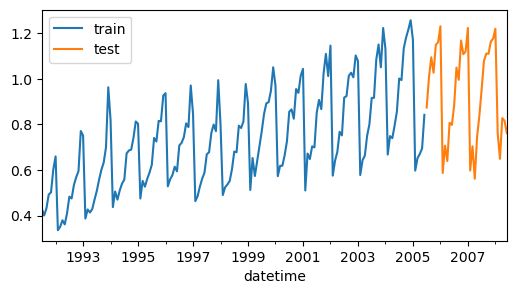

In [5]:

# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3))
data_train.plot(ax=ax, label='train')
data_test.plot(ax=ax, label='test')
ax.legend();

In [6]:
# Create and fit forecaster
# ==============================================================================
forecaster = ForecasterDirect(
                 regressor       = Ridge(),
                 steps           = 36,
                 lags            = 15,
                 window_features = RollingFeatures(stats=['mean'], window_sizes=10),
                 transformer_y   = None,
                 n_jobs          = 'auto'
             )

forecaster.fit(y=data_train)
forecaster

================ 
ForecasterDirect 
================ 
Regressor: Ridge 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] 
Window features: ['roll_mean_10'] 
Window size: 15 
Maximum steps to predict: 36 
Exogenous included: False 
Exogenous names: None 
Transformer for y: None 
Transformer for exog: None 
Weight function included: False 
Differentiation order: None 
Training range: [Timestamp('1991-07-01 00:00:00'), Timestamp('2005-06-01 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: MS 
Regressor parameters: 
    {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None,
    'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001} 
fit_kwargs: {} 
Creation date: 2025-01-13 12:24:49 
Last fit date: 2025-01-13 12:24:49 
Skforecast version: 0.14.0 
Python version: 3.12.8 
Forecaster id: None

In [7]:
# Predict
# ==============================================================================
# Predict only a subset of steps
predictions = forecaster.predict(steps=[1, 5])
display(predictions)

2005-07-01    0.952188
2005-11-01    1.180630
Name: pred, dtype: float64

In [8]:
# Predict all steps defined in the initialization.
predictions = forecaster.predict()
display(predictions.head(3))

2005-07-01    0.952188
2005-08-01    1.004327
2005-09-01    1.115190
Freq: MS, Name: pred, dtype: float64

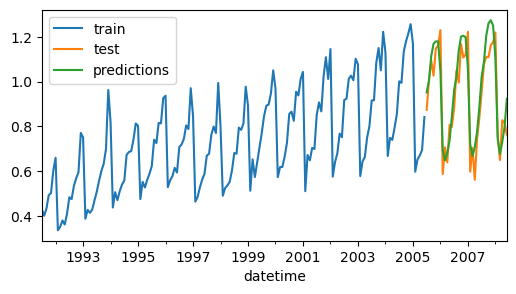

In [9]:
# Plot predictions
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3))
data_train.plot(ax=ax, label='train')
data_test.plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

---
_This notebook is licensed under a [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0)](https://creativecommons.org/licenses/by-nc-sa/4.0/). Copyright © 2018-2024 [Point 8 GmbH](https://point-8.de)_